# Contents:
1. <a href="#Basic-Image-Processing-using-PIL-:-Cropping-Image">Crop Image</a>
2. <a href="#Copying-an-Image:">Copy an Image</a>
3. <a href="#Basic-Image-Processing-using-PIL-:-Transposing">Transpose (Interpolation)</a>
4. <a href="#Basic-Image-Processing-using-PIL-:-Resizing">Image Resizing algorithms</a>
5. <a href="#Basic-Image-Processing-using-PIL-:-Rotation">Image Rotation</a>
6. <a href="#Applying-Mask-on-1-Channeled-Image-(Only-3x3-Complete)">Applying 3x3 Masks</a>
<hr>

# Basic Image Processing using PIL : Cropping Image
NOTE: There are some things to understand while doing cropping here. Notice that Image Size here is supposed to be like (height,width) but when using PIL it's (width,height) Read comments for short explanation. Still couldn't understand, Google it... or watch a YouTube video.

Reference: <a href="https://www.youtube.com/watch?v=dkp4wUhCwR4">YouTube Video</a>

In [66]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Function for displaying lines on image indicating cropped area
def imgDot(img,x,y):
    print('(',x,',',y,')')
    img[x,:,0]=255 # [row, column, channel]
    img[:,y,0]=255
    
def imgCrop(img, startX, startY, endX, endY):
    if startX>=0 and startX<endX and startY>=0 and startY<endY and endX>startX and endX<img.height and endY>startY and endY<img.width:
        img_crop=img.crop((startY,startX,endY,endX)) # PIL uses cartesian plane system (horizontal, vertical) or (width,height)
        img=np.array(img) # Converting PIL Image to numpy array
        imgDot(img, startX, startY)
        imgDot(img, endX, endY)
        return img, img_crop
    else:
        print('Incorrect parameters')

Image Size: (1366, 768)
Image Height: 768
Image Width: 1366
Image Mode: RGB
( 10 , 850 )
( 740 , 1360 )


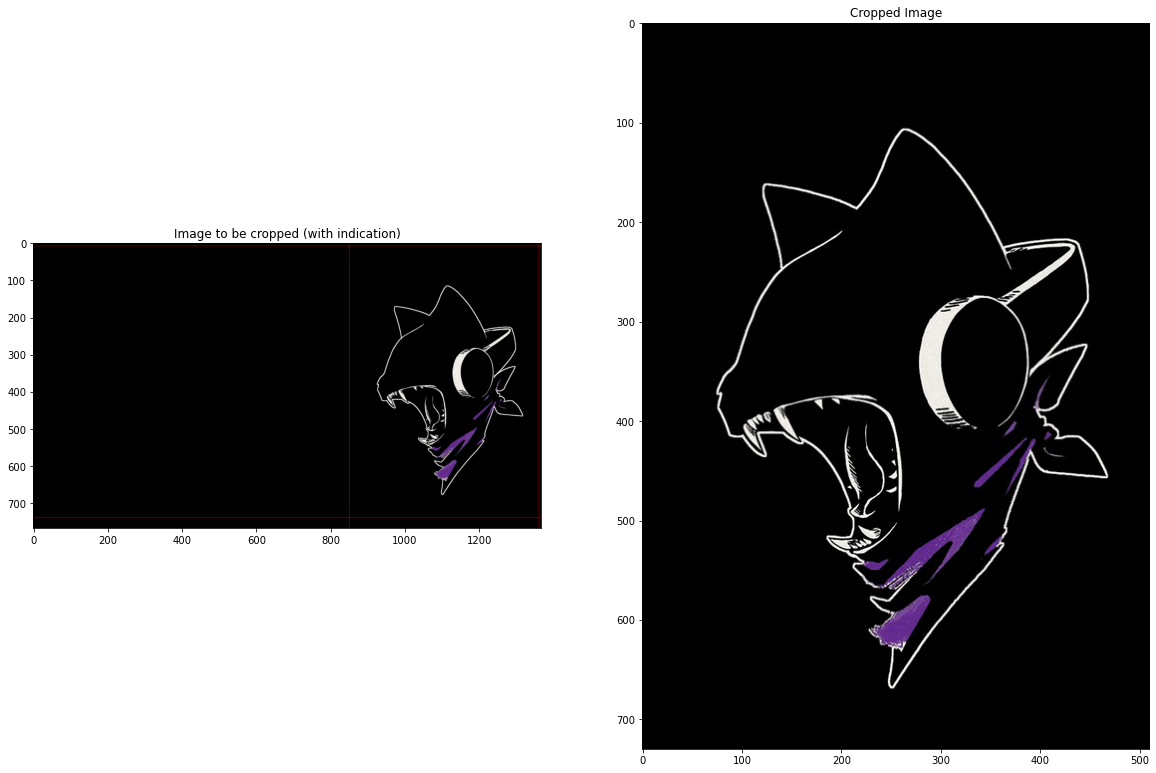

In [5]:
img=Image.open('default.jpg')
print('Image Size:',img.size)
print('Image Height:',img.height)
print('Image Width:',img.width)
print('Image Mode:',img.mode) # mode gives the channel format (HSV, RGB, BGR etc.)
startX = 10;startY = 850;endX = 740;endY = 1360
img,img_crop=imgCrop(img, startX, startY, endX, endY)

plt.figure(figsize=(20,20))
plt.subplot(1,2,1)
plt.title('Image to be cropped (with indication)')
plt.imshow(img)

plt.subplot(1,2,2)
plt.title('Cropped Image')
plt.imshow(img_crop)

### Copying an Image:

As you might already know variables are always passed by reference, Sometimes we need to make a copy so that it won't disturb the original image, so to make a copy of an image:

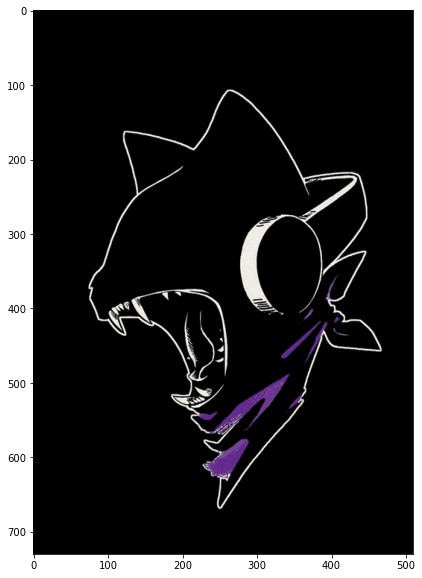

In [11]:
img_copy=img_crop.copy()
plt.figure(figsize=(10,10))
plt.imshow(img_copy)

# Basic Image Processing using PIL : Transposing
We can change orientation of image using transpose function and takes only one parameter i.e. what type of transpose to apply.

Read the <a href="https://pillow.readthedocs.io/en/stable/reference/Image.html#transpose-methods">Official Documentation</a>

Following are six transposing methods:

Image.FLIP_LEFT_RIGHT 

Image.FLIP_TOP_BOTTOM

Image.ROTATE90 -> Rotations described will be anticlockwise

Image.ROTATE180

Image.ROTATE279

Image.TRANSPOSE

Above functions return Image object.

Also, I'm going to make multiple images show down here at once.

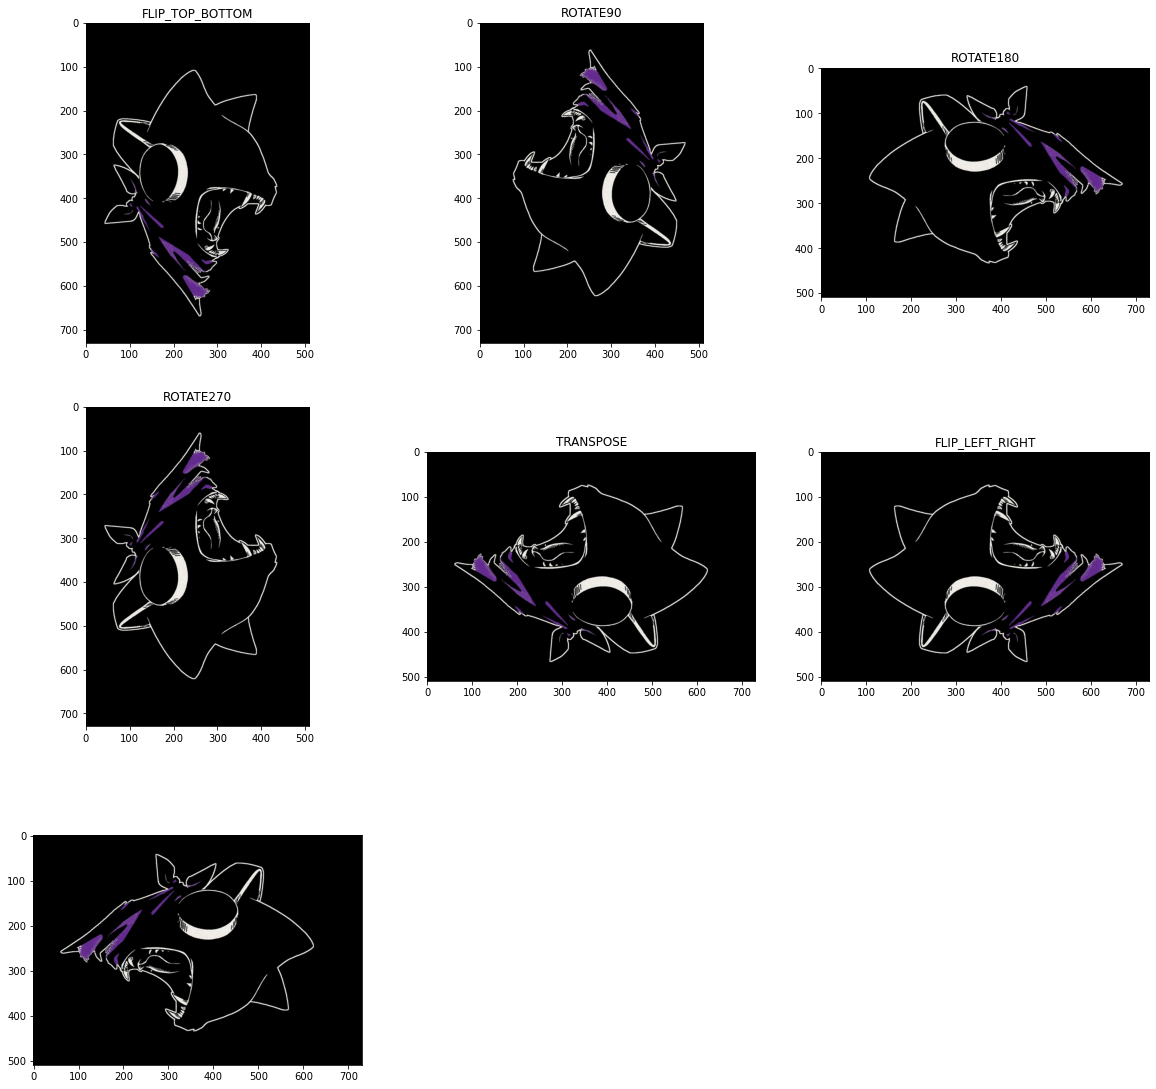

In [5]:
# NOTE: I'm going to use img_crop Image here.
tr_img1=img_crop.transpose(Image.FLIP_LEFT_RIGHT)
tr_img2=img_crop.transpose(Image.FLIP_TOP_BOTTOM)
tr_img3=img_crop.transpose(Image.ROTATE_90)
tr_img4=img_crop.transpose(Image.ROTATE_180)
tr_img5=img_crop.transpose(Image.ROTATE_270)
tr_img6=img_crop.transpose(Image.TRANSPOSE)
tr_img7=img_crop.transpose(Image.TRANSVERSE)
plt.figure(figsize=(20,20)) # figsize is size of figures. Try changing it so you'll understand
plt.title('FLIP_LEFT_RIGHT')
# README: plt.subplot(how many lines of images?, how many images in one line?, index of current image)
plt.subplot(3,3,1) # Here, subplot expects to have 3 lines of images and 3 images in a line, means total 9 images can be subplotted
plt.imshow(tr_img1)

plt.title('FLIP_TOP_BOTTOM')
plt.subplot(3,3,2)
plt.imshow(tr_img2)

plt.title('ROTATE90')
plt.subplot(3,3,3)
plt.imshow(tr_img3)

plt.title('ROTATE180')
plt.subplot(3,3,4)
plt.imshow(tr_img4)

plt.title('ROTATE270')
plt.subplot(3,3,5)
plt.imshow(tr_img5)

plt.title('TRANSPOSE')
plt.subplot(3,3,6)
plt.imshow(tr_img6)

plt.title('FLIP_LEFT_RIGHT')
plt.subplot(3,3,7)
plt.imshow(tr_img7)

# Basic Image Processing using PIL : Resizing
Resizing function accepts a dual tuple pair that is the new size of image.
'dual tuple pair' -> (width, height) Combination of two variables/constrants in round brackets
<hr>

### Interpolation

Decreasing or increasing image size involves some algorithms known as Interpolation
Interpolation happens anytime you resize or remap (distort) your image from one pixel grid to another. Image resizing is necessary when you need to increase or decrease the total number of pixels, whereas remapping can occur under a wider variety of scenarios: correcting for lens distortion, changing perspective, and rotating an image. <a href="https://www.cambridgeincolour.com/tutorials/image-interpolation.htm">More Info</a>

### Interpolation Techniques

You can find explanation about following Interpolation Techniques/Resampling Filters by reading <a href="https://pillow.readthedocs.io/en/stable/reference/Image.html#resampling-filters">Official Documentation</a>

1. NEAREST -> Simplest but Poor quality

2. BOX -> Not recommended

3. BILINEAR -> Decent

4. HAMMING -> Decent

5. BICUBIC -> Better Quality

6. LANCZOS-> Better Quality


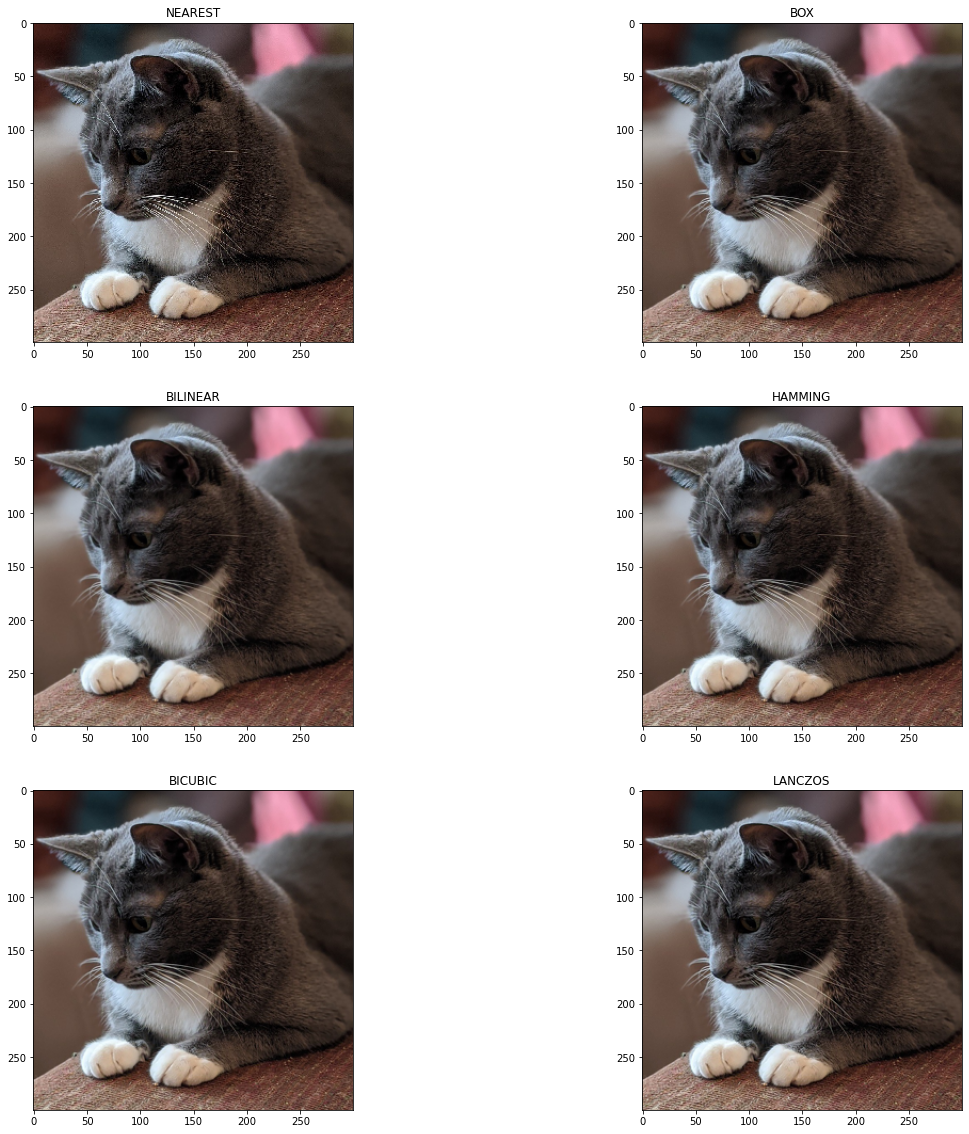

In [79]:
newsize=(300,300) # NOTE: Image's original height-to-width ratio might change
img=Image.open("catpic5.jpg")
res_img1=img.resize(newsize, Image.NEAREST)
res_img2=img.resize(newsize, Image.BOX)
res_img3=img.resize(newsize, Image.BILINEAR)
res_img4=img.resize(newsize, Image.HAMMING)
res_img5=img.resize(newsize, Image.BICUBIC)
res_img6=img.resize(newsize, Image.LANCZOS)

plt.figure(figsize=(20,20))

plt.subplot(3,2,1)
plt.title('NEAREST')
plt.imshow(res_img1)
res_img1.save('Nearest.jpg')

plt.subplot(3,2,2)
plt.title('BOX')
plt.imshow(res_img2)
res_img2.save('Box.jpg')

plt.subplot(3,2,3)
plt.title('BILINEAR')
plt.imshow(res_img3)
res_img3.save('Bilinear.jpg')

plt.subplot(3,2,4)
plt.title('HAMMING')
plt.imshow(res_img4)
res_img4.save('Hamming.jpg')

plt.subplot(3,2,5)
plt.title('BICUBIC')
plt.imshow(res_img5)
res_img5.save('Bicubic.jpg')

plt.subplot(3,2,6)
plt.title('LANCZOS')
plt.imshow(res_img6)
res_img6.save('Lanczos.jpg')

### Basic Image Processing using PIL : Rotation
Note that this rotation is different from the ones I used in <a href="#Basic-Image-Processing-using-PIL-:-Transposing">transpose section</a>. This method also seems to crop the image from it's edges and keeps same image size which can be clearly observed when rotated by 90<sup>o</sup>

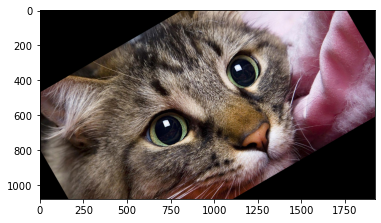

In [22]:
img=Image.open('catpic2.jpg')
angle=30
img=img.rotate(angle)
plt.imshow(img)

# Applying Mask on 1-Channeled Image (Only 3x3 Complete)

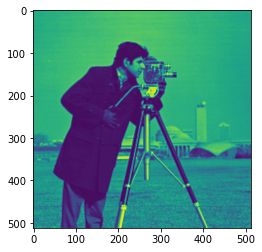

In [27]:
from skimage import data
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
mask=[[1, 2, 1], [2, 3, 2], [1, 2, 1]]
camera_img=data.camera()
plt.imshow(camera_img)

In [9]:
camera_img

array([[156, 157, 160, ..., 152, 152, 152],
       [156, 157, 159, ..., 152, 152, 152],
       [158, 157, 156, ..., 152, 152, 152],
       ...,
       [121, 123, 126, ..., 121, 113, 111],
       [121, 123, 126, ..., 121, 113, 111],
       [121, 123, 126, ..., 121, 113, 111]], dtype=uint8)

In [28]:
def return3x3MaskAvg(img, x, y):
    mask=[[[img[x-1][y-1]], [img[x][y-1]], [img[x+1][y-1]]],
         [[img[x-1][y  ]], [img[x][y  ]], [img[x+1][y  ]]],
         [[img[x-1][y+1]], [img[x][y+1]], [img[x+1][y+1]]]
        ]
    mask=np.array(mask, dtype=np.uint8)
    avg=int(np.average(mask))
    return avg

return3x3MaskAvg(camera_img,2,2) #Sample Output

156

In [29]:
def apply3x3Mask(img_in, x, y, mask_avg):
    img=img_in.copy()
    img[x-1][y-1]=mask_avg;img[x][y-1]=mask_avg;img[x+1][y-1]=mask_avg
    img[x-1][y  ]=mask_avg;img[x][y  ]=mask_avg;img[x+1][y  ]=mask_avg
    img[x-1][y+1]=mask_avg;img[x][y+1]=mask_avg;img[x-1][y+1]=mask_avg
    return img

# mask=[[[-1,-1], [0,-1], [1,-1]],
#           [[-1, 0], [0, 0], [1, 0]],
#           [[-1, 1], [0, 1], [1, 1]]]

In [30]:
img2=camera_img.copy()

NOTE: It may take a while to run below cell

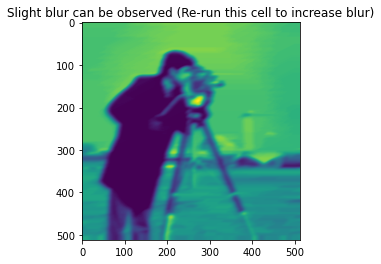

In [36]:
for x in range(1,511):
    for y in range(1,511):
        img2=apply3x3Mask(img2, x, y, return3x3MaskAvg(img2, x, y))
plt.title('Slight blur can be observed (Re-run this cell to increase blur)')
plt.imshow(img2)

# Short descriptions of Libraries
skimage -> For Segmentation, Geometric trans, Color_space manip, Analysis, Filtering, Morphology, Feature Detection

scipy -> Common img operations -> Reading, Segmentation, Convolution, Face detection, Feature Extraction

PIL -> Reading, Rescaling, Saving, Image Archives, Image display

numpy -> Image masking, cropping, manipulating pixel values

cv2 -> OpenCV -> Computer vision

pgmagick -> Resizing, Rotation, Sharpening, Gradient images, drawing text